In [2]:
from langgraph.graph import StateGraph, MessagesState, START,END

In [3]:
from langchain.chat_models import init_chat_model

In [4]:
from dotenv import load_dotenv
load_dotenv()

True

In [5]:
#gemini_llm = init_chat_model(model="gpt-4o")
model_id = "gemini-2.0-flash-lite-001"
gemini_llm = init_chat_model(model=model_id, model_provider="google_vertexai")

In [6]:
class SummaryState(MessagesState):
    summary: str

In [7]:
def answer(state: SummaryState) -> SummaryState:
    state['messages']= gemini_llm.invoke(state['messages'])
    return state

In [8]:
from langgraph.checkpoint.memory import InMemorySaver

In [9]:
graph_builder = StateGraph(SummaryState)
graph_builder.add_node("response", answer)
graph_builder.add_edge(START, "response")
graph_builder.add_edge("response", END)
graph = graph_builder.compile(checkpointer=InMemorySaver())

In [10]:
from langgraph.graph.state import CompiledStateGraph
from IPython.display import Image, display

def draw_graph(graph: CompiledStateGraph):
    display(Image(graph.get_graph().draw_mermaid_png()))

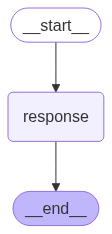

In [11]:
draw_graph(graph)

In [12]:
from langchain_core.messages import SystemMessage, HumanMessage, AIMessage

In [19]:
message = [SystemMessage(content="You are an Helpful Assistant")]

In [23]:
message = [
    HumanMessage(content="Hello, how are you?")
]
result = graph.invoke({
    "messages": message
}, config={"configurable": {"thread_id": "11"}})
result

{'messages': [SystemMessage(content='You are an Helpful Assistant', additional_kwargs={}, response_metadata={}, id='4ea06785-95e1-4864-b4b1-0b9d2041f8ec'),
  SystemMessage(content='You are an Helpful Assistant', additional_kwargs={}, response_metadata={}, id='331d5a2c-2500-4158-b00d-368624568e4b'),
  SystemMessage(content='You are an Helpful Assistant', additional_kwargs={}, response_metadata={}, id='1ff47ac3-36bc-41cd-9627-97c3c4c19187'),
  SystemMessage(content='You are an Helpful Assistant', additional_kwargs={}, response_metadata={}, id='7327b03e-2be3-4fb3-b634-fed7e1ddd215'),
  HumanMessage(content='Hello, how are you?', additional_kwargs={}, response_metadata={}, id='2b3e905f-c20c-473c-a53e-d37ac8a011c8'),
  AIMessage(content='I am doing well, thank you for asking! How can I help you today?\n', additional_kwargs={}, response_metadata={'is_blocked': False, 'safety_ratings': [], 'usage_metadata': {'prompt_token_count': 26, 'candidates_token_count': 18, 'total_token_count': 44, 'pro

In [24]:

message = [
    HumanMessage(content="Hello, how are you?")
]
result = graph.invoke({
    "messages": message
    
},config={"configurable": {"thread_id": "11"}})

In [25]:
result['messages']

[SystemMessage(content='You are an Helpful Assistant', additional_kwargs={}, response_metadata={}, id='4ea06785-95e1-4864-b4b1-0b9d2041f8ec'),
 SystemMessage(content='You are an Helpful Assistant', additional_kwargs={}, response_metadata={}, id='331d5a2c-2500-4158-b00d-368624568e4b'),
 SystemMessage(content='You are an Helpful Assistant', additional_kwargs={}, response_metadata={}, id='1ff47ac3-36bc-41cd-9627-97c3c4c19187'),
 SystemMessage(content='You are an Helpful Assistant', additional_kwargs={}, response_metadata={}, id='7327b03e-2be3-4fb3-b634-fed7e1ddd215'),
 HumanMessage(content='Hello, how are you?', additional_kwargs={}, response_metadata={}, id='2b3e905f-c20c-473c-a53e-d37ac8a011c8'),
 AIMessage(content='I am doing well, thank you for asking! How can I help you today?\n', additional_kwargs={}, response_metadata={'is_blocked': False, 'safety_ratings': [], 'usage_metadata': {'prompt_token_count': 26, 'candidates_token_count': 18, 'total_token_count': 44, 'prompt_tokens_details

In [82]:
result = graph.invoke({
    "messages": HumanMessage("When was IPL launched in India ?")
},config={"configurable": {"thread_id": "11"}})

In [83]:
result['messages']

[SystemMessage(content='You are an Helpful Assistant', additional_kwargs={}, response_metadata={}, id='f967af25-d8e2-49ce-abc9-ef18a5432b54'),
 AIMessage(content='Hello! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 9, 'prompt_tokens': 12, 'total_tokens': 21, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_a288987b44', 'id': 'chatcmpl-BglUcNozOnkeWtcVdMsSQ6lqXK2G3', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--be476adc-ab8c-4ce9-85b8-b667d727207c-0', usage_metadata={'input_tokens': 12, 'output_tokens': 9, 'total_tokens': 21, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}}),
 HumanMessage(content='When 

In [84]:
result = graph.invoke({
    "messages": HumanMessage("Which cricketer got the highest bid price during launch ?")
},config={"configurable": {"thread_id": "11"}})

In [85]:
result['messages']

[SystemMessage(content='You are an Helpful Assistant', additional_kwargs={}, response_metadata={}, id='f967af25-d8e2-49ce-abc9-ef18a5432b54'),
 AIMessage(content='Hello! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 9, 'prompt_tokens': 12, 'total_tokens': 21, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_a288987b44', 'id': 'chatcmpl-BglUcNozOnkeWtcVdMsSQ6lqXK2G3', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--be476adc-ab8c-4ce9-85b8-b667d727207c-0', usage_metadata={'input_tokens': 12, 'output_tokens': 9, 'total_tokens': 21, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}}),
 HumanMessage(content='When 

In [86]:
result = graph.invoke({
    "messages": HumanMessage("I like Rohit Sharma, Which Team was he during first ipl")
},config={"configurable": {"thread_id": "11"}})

In [87]:
result['messages']

[SystemMessage(content='You are an Helpful Assistant', additional_kwargs={}, response_metadata={}, id='f967af25-d8e2-49ce-abc9-ef18a5432b54'),
 AIMessage(content='Hello! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 9, 'prompt_tokens': 12, 'total_tokens': 21, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_a288987b44', 'id': 'chatcmpl-BglUcNozOnkeWtcVdMsSQ6lqXK2G3', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--be476adc-ab8c-4ce9-85b8-b667d727207c-0', usage_metadata={'input_tokens': 12, 'output_tokens': 9, 'total_tokens': 21, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}}),
 HumanMessage(content='When 

In [88]:

response = gemini_llm.invoke(f"Can you summarize {result['messages']}")

In [89]:
response

AIMessage(content="The conversation consists of a series of questions and answers about the Indian Premier League (IPL):\n\n1. **IPL Launch**: The IPL was launched on September 13, 2007, with the first season beginning on April 18, 2008. It is a professional Twenty20 cricket league in India and is very popular and lucrative.\n\n2. **Highest Bid in the First IPL Auction**: During the first IPL auction in 2008, Mahendra Singh Dhoni received the highest bid price. He was bought by the Chennai Super Kings for $1.5 million due to his leadership and cricketing skills.\n\n3. **Rohit Sharma's First IPL Team**: Rohit Sharma played for the Deccan Chargers during the first IPL season in 2008. He remained with them for three seasons before moving to the Mumbai Indians in 2011, where he later became a key player and captain.", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 185, 'prompt_tokens': 1472, 'total_tokens': 1657, 'completion_tokens_details': {'

In [90]:
gemini_llm = init_chat_model(model="gpt-4o")

In [91]:
class SummaryState(MessagesState):
    summary: str

In [92]:
def answer(state: SummaryState) -> SummaryState:
    summary = state['summary']
    
    if summary.strip() == "":
        messages = state['messages']
    else:
        system_message = f"This is conversation of existing summary {summary}"
        messages = [SystemMessage(system_message)] + state['messages']
    state['messages'] = gemini_llm.invoke(messages)
    return state
    

In [93]:
from langchain_core.messages import RemoveMessage
def summarize(state: SummaryState) -> SummaryState:
    summary = state['summary']

    if summary.strip() == "":
        pass
    else:
        if len(state['messages']) >= 6:
            system_message = SystemMessage(f"Summarize the following messsages {state['messages']}")
            result_message = gemini_llm.invoke(system_message)
            state['summary'] = result_message.content
            deleted_messages = [RemoveMessage(id = m.id) for m in state['messages'][-2:]]
            state['messages'] = deleted_messages + result_message
    return state

In [94]:
from typing import Literal
def should_summarise(state: SummaryState) -> Literal["yes", "no"]:
    if len(state['messages']) >= 6:
        return "yes"
    else:
        return "no"

In [95]:
summarize_graph_builder = StateGraph(SummaryState)
summarize_graph_builder.add_node("conversation", answer)
summarize_graph_builder.add_node("summarize_conversation", summarize)
summarize_graph_builder.set_entry_point("conversation")
summarize_graph_builder.add_conditional_edges(
   "conversation",
   should_summarise,
   {
       "yes": "summarize_conversation",
       "no": END
   }
)
summary_graph = summarize_graph_builder.compile(checkpointer=InMemorySaver())

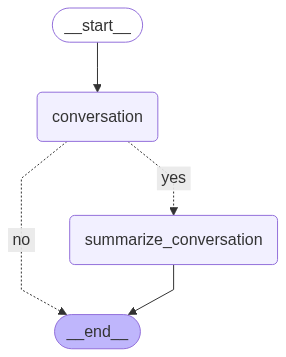

In [96]:
draw_graph(summary_graph)

In [97]:
result = summary_graph.invoke(
    { "messages": [
        SystemMessage("You are an expert Sports Author"),
        HumanMessage('What is most viewed Sport and what is the viewership?')],
        "summary": ""
    },
    config={"configurable": {"thread_id": "13"}}
)

In [98]:
result


{'messages': [SystemMessage(content='You are an expert Sports Author', additional_kwargs={}, response_metadata={}, id='afce3346-6da4-4b95-aec1-1833971e1f74'),
  HumanMessage(content='What is most viewed Sport and what is the viewership?', additional_kwargs={}, response_metadata={}, id='4a553f3f-6c90-47cc-8c3a-8be0d73b5f40'),
  AIMessage(content="The most viewed sport in the world is soccer, also known as football in most countries. The global nature of soccer, along with its rich history and accessibility, contributes to its immense popularity.\n\nFor example, the FIFA World Cup, which is the pinnacle of international soccer, attracts enormous viewership. The 2018 FIFA World Cup, held in Russia, reportedly reached a combined audience of over 3.5 billion viewers worldwide, with more than 1 billion people tuning in just for the final match between France and Croatia.\n\nSoccer's enduring appeal is evidenced by its massive fan base across continents, from Europe and the Americas to Africa

In [99]:
for message in result['messages']:
    message.pretty_print()

================================ System Message ================================

You are an expert Sports Author
================================ Human Message =================================

What is most viewed Sport and what is the viewership?
================================== Ai Message ==================================

The most viewed sport in the world is soccer, also known as football in most countries. The global nature of soccer, along with its rich history and accessibility, contributes to its immense popularity.

For example, the FIFA World Cup, which is the pinnacle of international soccer, attracts enormous viewership. The 2018 FIFA World Cup, held in Russia, reportedly reached a combined audience of over 3.5 billion viewers worldwide, with more than 1 billion people tuning in just for the final match between France and Croatia.

Soccer's enduring appeal is evidenced by its massive fan base across continents, from Europe and the Americas to Africa and Asia, supported

In [100]:
result = summary_graph.invoke(
    { "messages": [
        HumanMessage('Who is higest paid soccer personality in history ?')],
        "summary": ""
    },
    config={"configurable": {"thread_id": "13"}}
)
for message in result['messages']:
    message.pretty_print()

================================ System Message ================================

You are an expert Sports Author
================================ Human Message =================================

What is most viewed Sport and what is the viewership?
================================== Ai Message ==================================

The most viewed sport in the world is soccer, also known as football in most countries. The global nature of soccer, along with its rich history and accessibility, contributes to its immense popularity.

For example, the FIFA World Cup, which is the pinnacle of international soccer, attracts enormous viewership. The 2018 FIFA World Cup, held in Russia, reportedly reached a combined audience of over 3.5 billion viewers worldwide, with more than 1 billion people tuning in just for the final match between France and Croatia.

Soccer's enduring appeal is evidenced by its massive fan base across continents, from Europe and the Americas to Africa and Asia, supported

In [101]:
result = summary_graph.invoke(
    { "messages": [
        HumanMessage('Which team does messi represent in franchise leagues ?')],
        "summary": ""
    },
    config={"configurable": {"thread_id": "13"}}
)
for message in result['messages']:
    message.pretty_print()

================================ System Message ================================

You are an expert Sports Author
================================ Human Message =================================

What is most viewed Sport and what is the viewership?
================================== Ai Message ==================================

The most viewed sport in the world is soccer, also known as football in most countries. The global nature of soccer, along with its rich history and accessibility, contributes to its immense popularity.

For example, the FIFA World Cup, which is the pinnacle of international soccer, attracts enormous viewership. The 2018 FIFA World Cup, held in Russia, reportedly reached a combined audience of over 3.5 billion viewers worldwide, with more than 1 billion people tuning in just for the final match between France and Croatia.

Soccer's enduring appeal is evidenced by its massive fan base across continents, from Europe and the Americas to Africa and Asia, supported

In [102]:
result = summary_graph.invoke(
    { "messages": [
        HumanMessage('Which team does ronaldo represent in franchise leagues ?')],
        "summary": ""
    },
    config={"configurable": {"thread_id": "13"}}
)
for message in result['messages']:
    message.pretty_print()

================================ System Message ================================

You are an expert Sports Author
================================ Human Message =================================

What is most viewed Sport and what is the viewership?
================================== Ai Message ==================================

The most viewed sport in the world is soccer, also known as football in most countries. The global nature of soccer, along with its rich history and accessibility, contributes to its immense popularity.

For example, the FIFA World Cup, which is the pinnacle of international soccer, attracts enormous viewership. The 2018 FIFA World Cup, held in Russia, reportedly reached a combined audience of over 3.5 billion viewers worldwide, with more than 1 billion people tuning in just for the final match between France and Croatia.

Soccer's enduring appeal is evidenced by its massive fan base across continents, from Europe and the Americas to Africa and Asia, supported

In [103]:
len(result['messages'])

9

In [104]:
from langgraph.graph import StateGraph, MessagesState
class State(MessagesState):
    summary: str

In [105]:
from langchain_core.messages import SystemMessage

def call_model(state: State) -> State:
    summary = state['summary']

    if summary:
        system_message = f"Summary of conversation earlier: {summary}"
        messages = [SystemMessage(content=system_message)] + state['messages']
    else:
        messages = state['messages']
    response = gemini_llm.invoke(messages)
    return { "messages": response }

In [106]:
from langchain_core.messages import HumanMessage, RemoveMessage
def summarize_conversation(state: State) -> State:
    summary = state['summary']

    # Create our summarization prompt
    if summary:
        sumary_message = (
            f"This is summary of the conversation to date: {summary}",
            "Extend this summary by taking into account the new messages above:"
        )
    else:
        sumary_message = "Create a summary of the conversation above:"
    messages = state['messages'] + [HumanMessage(content=sumary_message)]
    response = gemini_llm.invoke(messages)

    delete_messages = [RemoveMessage(id=m.id) for m  in state['messages'][:-2]]
    return {"summary": response.content, "messages": delete_messages }

In [107]:
from langgraph.graph import END, START

def should_continue(state: State) -> Literal["summarize_conversation", END]:
    messages = state['messages']
    if len(messages) > 6:
        return "summarize_conversation"
    return END

In [126]:
from langgraph.checkpoint.memory import MemorySaver
workflow_builder = StateGraph(State)
workflow_builder.add_node("conversation", call_model)
workflow_builder.add_node("summarize_conversation",summarize_conversation)
workflow_builder.add_edge(START, "conversation")
workflow_builder.add_conditional_edges("conversation", should_continue)
workflow_builder.add_edge("summarize_conversation", END)

memory = MemorySaver()
graph = workflow_builder.compile(checkpointer=memory)


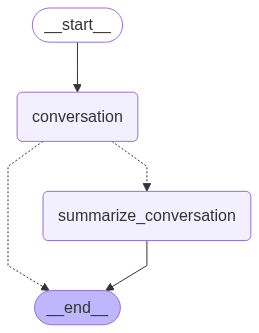

In [109]:
draw_graph(graph)

In [127]:
config = {"configurable": {"thread_id": "2"}}

# start the conversation

input_message = HumanMessage(content="Hi this is khaja")
output = graph.invoke({"messages": [input_message], "summary": None }, config=config)
for m in output['messages'][-1:]:
    m.pretty_print()

================================== Ai Message ==================================

Hello Khaja! How can I assist you today?


In [128]:
input_message = HumanMessage(content="Whats my name")
output = graph.invoke({"messages": [input_message] }, config=config)
for m in output['messages'][-1:]:
    m.pretty_print()

================================== Ai Message ==================================

You mentioned that your name is Khaja. How can I assist you further?


In [129]:
input_message = HumanMessage(content="I like Game of Thrones")
output = graph.invoke({"messages": [input_message] }, config=config)
for m in output['messages'][-1:]:
    m.pretty_print()

================================== Ai Message ==================================

That's great! "Game of Thrones" is a popular TV series based on the "A Song of Ice and Fire" books by George R.R. Martin. Do you have a favorite character or storyline from the series?


In [130]:
graph.get_state(config).values.get('summary')

In [131]:
graph.get_state(config).values.get('messages')

[HumanMessage(content='Hi this is khaja', additional_kwargs={}, response_metadata={}, id='4b666faa-f7a1-49e0-8382-3d7dd140c019'),
 AIMessage(content='Hello Khaja! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 11, 'prompt_tokens': 12, 'total_tokens': 23, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_a288987b44', 'id': 'chatcmpl-BglXCgIJ0f7ZCm61smYdp3c2JNXFv', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--61060a2d-3696-4a64-8b35-2eaaa7eaec29-0', usage_metadata={'input_tokens': 12, 'output_tokens': 11, 'total_tokens': 23, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}}),
 HumanMessage(content='Whats my n

In [132]:
input_message = HumanMessage(content="I like Daenerys Targaryen. But didnt like her death. Isn't that brutal")
output = graph.invoke({"messages": [input_message]}, config=config)
for m in output['messages'][-1:]:
    m.pretty_print()

================================== Ai Message ==================================

Daenerys Targaryen was indeed a compelling and complex character, and her journey was central to "Game of Thrones." Her death in the series finale was a controversial moment for many fans, as it signified a dramatic and tragic end to her story. Some viewers found it to be a poignant and powerful moment, while others felt it was abrupt or out of character. It's a testament to the show's ability to evoke strong emotions and opinions. What do you think about the decision to end her story that way?


In [133]:
print(graph.get_state(config).values.get('summary'))


The conversation began with Khaja introducing themselves and expressing their interest in the TV series "Game of Thrones." They specifically mentioned liking the character Daenerys Targaryen but were unhappy with her death, describing it as brutal. The response acknowledged the complexity and controversy surrounding Daenerys's storyline and asked for Khaja's opinion on the decision to end her story that way.


In [134]:
graph.get_state(config).values.get('messages')

[HumanMessage(content="I like Daenerys Targaryen. But didnt like her death. Isn't that brutal", additional_kwargs={}, response_metadata={}, id='da8b6e9a-1951-432e-96e7-0cf4c96b3af6'),
 AIMessage(content='Daenerys Targaryen was indeed a compelling and complex character, and her journey was central to "Game of Thrones." Her death in the series finale was a controversial moment for many fans, as it signified a dramatic and tragic end to her story. Some viewers found it to be a poignant and powerful moment, while others felt it was abrupt or out of character. It\'s a testament to the show\'s ability to evoke strong emotions and opinions. What do you think about the decision to end her story that way?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 104, 'prompt_tokens': 134, 'total_tokens': 238, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_toke

In [135]:
input_message = HumanMessage(content="I felt betrayed")
output = graph.invoke({"messages": [input_message] }, config=config)
for m in output['messages'][-1:]:
    m.pretty_print()

================================== Ai Message ==================================

It's understandable to feel that way, especially if you were invested in Daenerys's journey throughout the series. Her character went through significant growth and faced numerous challenges. Seeing her story end so tragically, and at the hands of someone she trusted, can feel like a betrayal of her character's potential. This reaction was shared by many fans who had hoped for a different resolution to her arc. How did you feel about the rest of the series finale?


In [136]:
print(graph.get_state(config).values.get('summary'))

The conversation began with Khaja introducing themselves and expressing their interest in the TV series "Game of Thrones." They specifically mentioned liking the character Daenerys Targaryen but were unhappy with her death, describing it as brutal. The response acknowledged the complexity and controversy surrounding Daenerys's storyline and asked for Khaja's opinion on the decision to end her story that way.


In [137]:
graph.get_state(config).values.get('messages')

[HumanMessage(content="I like Daenerys Targaryen. But didnt like her death. Isn't that brutal", additional_kwargs={}, response_metadata={}, id='da8b6e9a-1951-432e-96e7-0cf4c96b3af6'),
 AIMessage(content='Daenerys Targaryen was indeed a compelling and complex character, and her journey was central to "Game of Thrones." Her death in the series finale was a controversial moment for many fans, as it signified a dramatic and tragic end to her story. Some viewers found it to be a poignant and powerful moment, while others felt it was abrupt or out of character. It\'s a testament to the show\'s ability to evoke strong emotions and opinions. What do you think about the decision to end her story that way?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 104, 'prompt_tokens': 134, 'total_tokens': 238, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_toke